In [1]:
!pip install kaggle

In [2]:
#configurating the path of kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle datasets download -d girinathrs211555/pan-card-datasets

pan-card-datasets.zip: Skipping, found more recently modified local copy (use --force to force download)


In [4]:
# extrcing the compossed Dataset
from zipfile import ZipFile
dataset = '/content/pan-card-datasets.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


# **Importing Dependencies**

In [5]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [6]:
Pan_card_files = os.listdir('/content/PAN_CARD_DETECTION/Pan_Card')
print(Pan_card_files[0:5])

print(Pan_card_files[-5:])

['MA (107).jpeg', 'MA (1391).jpeg', 'MA (1320).jpeg', 'MA (1908).jpeg', 'MA (823).jpeg']
['MA (748).jpeg', 'MA (588).jpg', 'MA (2003).jpeg', 'MA (966).jpeg', 'MA (1225).jpg']


In [7]:
Not_Pan_card_files = os.listdir('/content/PAN_CARD_DETECTION/Not_Pan_Card')
print(Not_Pan_card_files[0:5])

print(Not_Pan_card_files[-5:])

['TA (665).jpeg', 'TA (915).jpeg', 'TA (3057).jpg', 'TA (3288).jpg', 'TA (468).jpeg']
['TA (388).jpeg', 'TA (2235).jpg', 'TA (1475).jpg', 'TA (2472).jpg', 'TA (1229).jpg']


In [8]:
print('Number of with Pan_card_files:', len(Pan_card_files))
print('Number of without Not_Pan_card_files:', len(Not_Pan_card_files))

Number of with Pan_card_files: 5000
Number of without Not_Pan_card_files: 5000


In [9]:
#create the labels

Pan_card_labels = [1]*5000

Not_Pan_card_labels = [0]*5000

In [10]:
# Checking wheather the labels are created as expected
print(Pan_card_labels[0:5])

print(Not_Pan_card_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [11]:
print(len(Pan_card_labels))
print(len(Not_Pan_card_labels))

5000
5000


In [12]:
# I am Concanating  the  two class as labels

labels = Pan_card_labels + Not_Pan_card_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

10000
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [13]:
# Convert images to numpy arrays

Pan_card_path = '/content/PAN_CARD_DETECTION/Pan_Card/'

data = []
for img_file in Pan_card_files:

  image = Image.open(Pan_card_path + img_file)
  image = image.resize((128,128))
  image = image.convert("RGB")
  image = np.array(image)
  data.append(image)


Not_Pan_card_path = '/content/PAN_CARD_DETECTION/Not_Pan_Card/'

for img_file in Not_Pan_card_files:

  image = Image.open(Not_Pan_card_path + img_file)
  image = image.resize((128,128))
  image = image.convert("RGB")
  image = np.array(image)
  data.append(image)

In [14]:
# Coverting image list and the label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [15]:
type(X)

numpy.ndarray

In [16]:
type(Y)

numpy.ndarray

In [17]:
print(X.shape)
print(Y.shape)

(10000, 128, 128, 3)
(10000,)


In [18]:
print(Y)

[1 1 1 ... 0 0 0]


# **Train Test Split**

In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [20]:
print(X.shape, X_train.shape, X_test.shape)

(10000, 128, 128, 3) (8000, 128, 128, 3) (2000, 128, 128, 3)


In [21]:
#Scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

# **Building a Convolutional Neural Network(CNN)**

In [22]:
import tensorflow as tf
from tensorflow import keras

In [23]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(1200, kernel_size=(3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(keras.layers.Conv2D(1500, kernel_size=(3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(keras.layers.Conv2D(1700, kernel_size=(3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(keras.layers.Conv2D(1800, kernel_size=(3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(keras.layers.Conv2D(2000, kernel_size=(3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(256, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(16, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))


In [24]:
# Compile the neural network

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [25]:
#traing the neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.2, epochs=10)

Epoch 1/10
200/200 [==============================] - 442s 2s/step - loss: 0.8713 - acc: 0.5423 - val_loss: 0.6628 - val_acc: 0.5362
Epoch 2/10
200/200 [==============================] - 315s 2s/step - loss: 0.6158 - acc: 0.6833 - val_loss: 0.7194 - val_acc: 0.4863
Epoch 3/10
200/200 [==============================] - 311s 2s/step - loss: 0.6151 - acc: 0.6728 - val_loss: 0.4503 - val_acc: 0.8550
Epoch 4/10
200/200 [==============================] - 328s 2s/step - loss: 0.5974 - acc: 0.7253 - val_loss: 0.5797 - val_acc: 0.6344
Epoch 5/10
200/200 [==============================] - 324s 2s/step - loss: 0.5937 - acc: 0.6578 - val_loss: 0.6304 - val_acc: 0.5813
Epoch 6/10
200/200 [==============================] - 305s 2s/step - loss: 0.6232 - acc: 0.6017 - val_loss: 0.6259 - val_acc: 0.5813
Epoch 7/10
200/200 [==============================] - 305s 2s/step - loss: 0.6187 - acc: 0.6041 - val_loss: 0.6256 - val_acc: 0.5813
Epoch 8/10
200/200 [==============================] - 304s 2s/step - 

In [26]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy=', accuracy)

63/63 [==============================] - 44s 692ms/step - loss: 0.2943 - acc: 0.9065
Test Accuracy= 0.906499981880188


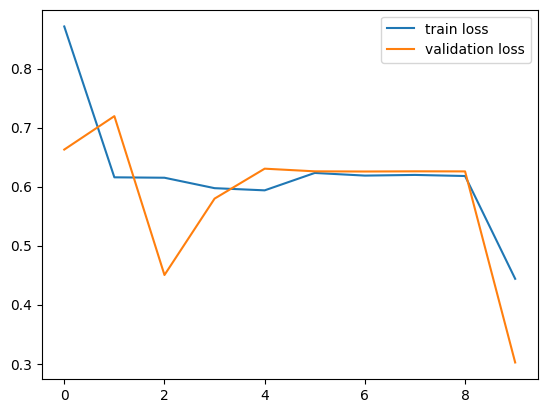

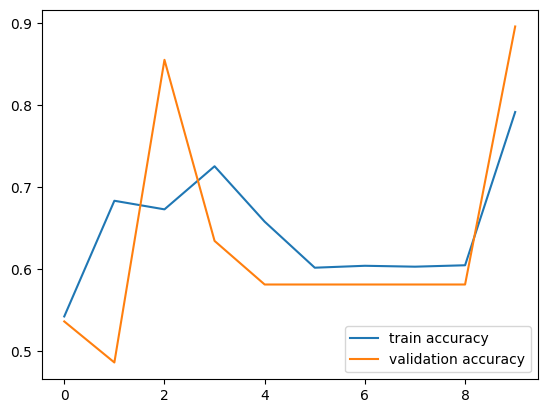

In [27]:
h = history

#plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

#plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

Path of the image to be predicted: /content/PC (1).jfif


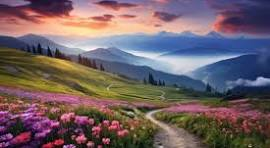

1/1 [==============================] - 0s 23ms/step
[[1.         0.98447186]]
0
This not an Pan card


In [30]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128, 128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 1:

  print('This is an Pan card')

else:

  print('This not an Pan card')


In [29]:
model.save('Pandulla.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
